In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [9]:
x,y = make_regression(n_samples = 100,n_features=1,n_informative=1,n_targets=1,noise=40,random_state=1)

In [10]:
x.shape,y.shape

((100, 1), (100,))

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.coef_,lr.intercept_

(array([83.24070275]), np.float64(8.564576966321196))

D:\ML\vml_env\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\ML\vml_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ML\vml_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+04, tolerance: 5.369e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


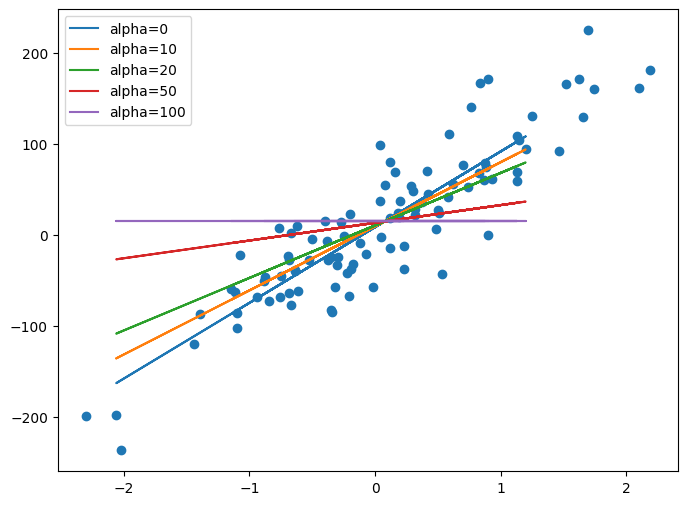

In [16]:
alpha = [0,10,20,50,100]
plt.figure(figsize=(8,6))
plt.scatter(x,y)
for i in alpha:
    l = Lasso(alpha=i)
    l.fit(X_train,Y_train)
    plt.plot(X_test,l.predict(X_test),label = f"alpha={i}")
    
plt.legend()
plt.show()

In [18]:
x1 = 5 * np.random.rand(100,1) - 2 
x2 = 0.7 * x1**2 -2 * x1 + np.random.randn(100,1)

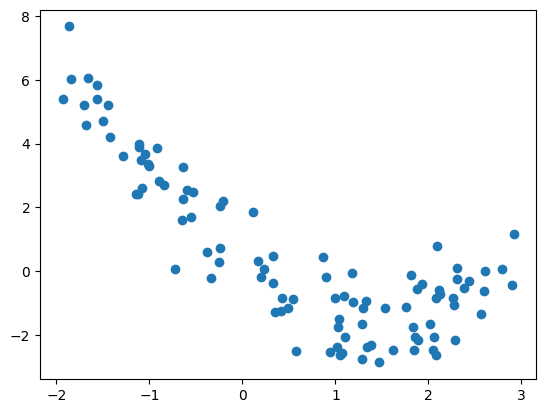

In [19]:
plt.scatter(x1,x2)

D:\ML\vml_env\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\ML\vml_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ML\vml_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.544e+01, tolerance: 6.415e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
D:\ML\vml_env\lib\site

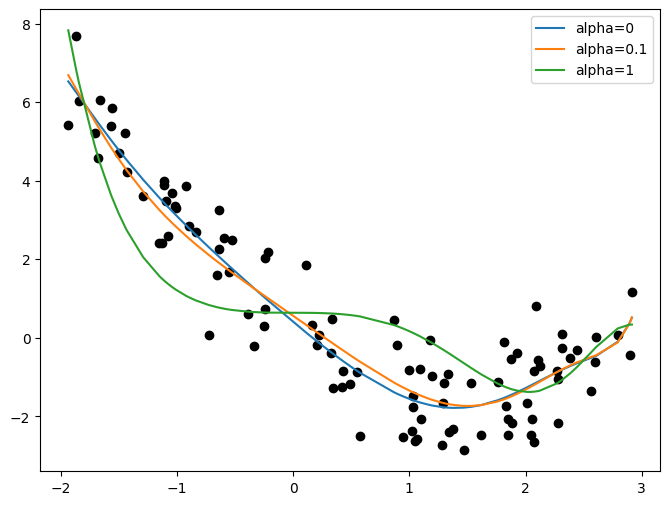

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def get_lasso_pred(x1,x2,alpha):
    model = Pipeline([
        ("poly",PolynomialFeatures(degree=16)),
        ("lasso",Lasso(alpha=alpha))
     ])
    model.fit(x1,x2)
    return model.predict(x1)

alpha = [0,0.1,1]
plt.figure(figsize=(8,6))
for i in alpha:
    pred = get_lasso_pred(x1,x2,i)
    sns.lineplot(x=x1.ravel(),y=pred,label=f"alpha={i}")

plt.scatter(x1,x2,color='black')
plt.legend()
plt.show()

HOW COEFFICIENTS ARE EFFECTED?
--

In [43]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [38]:
data = load_diabetes()

In [50]:
df =  pd.DataFrame(data.data,data.target,columns=data.feature_names)
df['target'] = data.target

In [51]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=1)

In [94]:
coef = []
r = []
for i in [0,0.1,1,3]:
    l = Lasso(alpha=i)
    l.fit(X_train,Y_train)
    pred = l.predict(X_test)
    coef.append(l.coef_)  
    r.append(r2_score(Y_test,pred))

D:\ML\vml_env\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\ML\vml_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ML\vml_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e+05, tolerance: 2.144e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


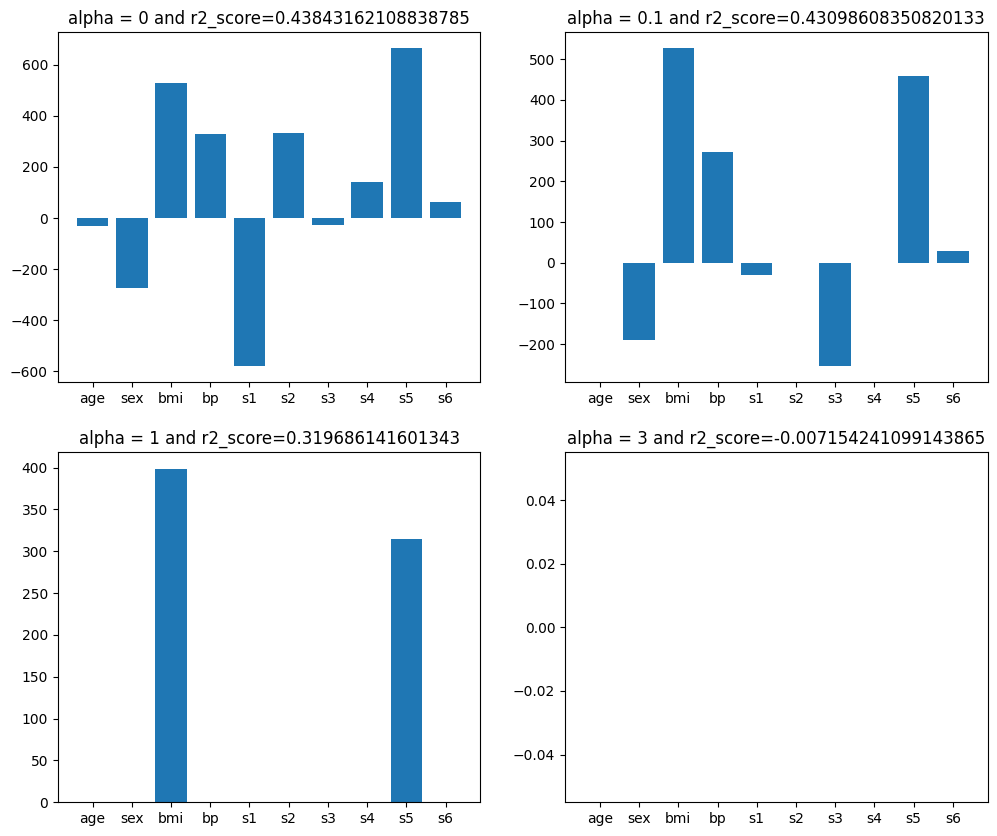

In [96]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.bar(data.feature_names,coef[0])
plt.title(f"alpha = 0 and r2_score={r[0]}")

plt.subplot(222)
plt.bar(data.feature_names,coef[1])
plt.title(f"alpha = 0.1 and r2_score={r[1]}")

plt.subplot(223)
plt.bar(data.feature_names,coef[2])
plt.title(f"alpha = 1 and r2_score={r[2]}")

plt.subplot(224)
plt.bar(data.feature_names,coef[3])
plt.title(f"alpha = 3 and r2_score={r[3]}")

plt.show()

EFFECT ON LOSS FUNCTION
--

In [112]:
def cal_loss(m,alpha):
    return np.sum((y - m*x.ravel() + 8.564576966321196)**2) + alpha*abs(m)

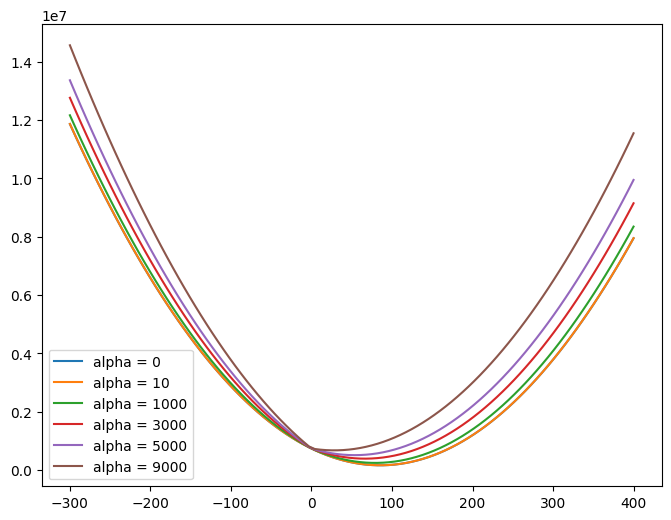

In [116]:
m = np.linspace(-300,400,100)

alpha2 = [0,10,1000,3000,5000,9000]
plt.figure(figsize=(8,6))
for i in alpha2:
    loss= []
    for j in range(100):
        loss_m = cal_loss(m[j],i)
        loss.append(loss_m)
    plt.plot(m,loss,label=f"alpha = {i}")


plt.legend()
plt.show()